In [12]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import trapezoid, simpson, quad_vec

## Zadanie 1
Na początku zdefiniowaliśmy funkcję podcałkową $\frac{4}{1+x^{2}}$ oraz skopiowaliśmy funkcje liczące kwadratury prostokątów, trapezów, Simpsona i Gaussa-Legendre’a z poprzedniego laboratorium. Następnie zdefiniowaliśmy funkcje liczące kwadratury adaptacyjne trapezów i Gaussa-Kronroda. W tym celu użyliśmy funkcji `scipy.integrate.quad_vec` z argumentami odpowiednio `quadrature='trapezoid'` i `quadrature='gk21'`, oraz z wartościami tolerancji $ eps=10^{0}...10^{-14} $. Wartość błędu bezwzględnego i ilość wywołań odczytaliśmy z dodatkowych informacji zawartych w strukturze zwracanej przez funkcję (odpowiednio `result[1]` i `result[-1].neval`). Otrzymane wyniki przedstawiliśmy na poniższym wykresie 1.

In [13]:
def f(x):
    return 4 / (1 + x ** 2)


real_integral_val = np.pi
a = 0
b = 1
width = b - a


def rect_integral(xs):
    s = 0
    for i in range(len(xs) - 1):
        dx = xs[i + 1] - xs[i]
        x = (xs[i] + xs[i + 1]) / 2
        s += f(x) * dx
    return s


def trap_integral(xs):
    return trapezoid(f(xs), xs)


def simps_integral(xs):
    return simpson(f(xs), xs)


def trap_adaptive_integral(epsrel):
    return quad_vec(f, a, b, epsrel=epsrel, quadrature='trapezoid', full_output=True)


def gauss_kronrod_integral(epsrel):
    return quad_vec(f, a, b, epsrel=epsrel, quadrature='gk21', full_output=True)


m_vec = np.arange(1, 26)
n_vec = 2 ** m_vec + 1
h_vec = width / n_vec


def calc_err(integral_fun, n):
    xs = np.linspace(a, b, n, dtype=np.double)
    vals = integral_fun(xs)
    return np.abs((vals - real_integral_val) / real_integral_val)


def calc_err_and_eval_adaptive(integral_fun, n):
    result = integral_fun(n)
    err = result[1]
    eval_count = result[-1].neval
    return err, eval_count


quad_err = np.array([calc_err(rect_integral, n) for n in n_vec])
trap_err = np.array([calc_err(trap_integral, n) for n in n_vec])
simps_err = np.array([calc_err(simps_integral, n) for n in n_vec])

adaptive_eps_vec = np.pow(0.1, np.arange(0, 15))

trap_adaptive_calc = [calc_err_and_eval_adaptive(trap_adaptive_integral, eps) for eps in adaptive_eps_vec]
trap_adaptive_err = [e for (e, _) in trap_adaptive_calc]
trap_adaptive_n_vec = [n for (_, n) in trap_adaptive_calc]

gauss_kronrod_calc = [calc_err_and_eval_adaptive(gauss_kronrod_integral, eps) for eps in adaptive_eps_vec]
gauss_kronrod_err = [e for (e, _) in gauss_kronrod_calc]
gauss_kronrod_n_vec = [n for (_, n) in gauss_kronrod_calc]
m_vec_gauss = np.arange(1, 14)
n_vec_gauss = 2 ** m_vec_gauss + 1
leggaus_vals = [np.polynomial.legendre.leggauss(m) for m in n_vec_gauss]
x_vec_gauss = [x_vec * 0.5 + 0.5 for (x_vec, _) in leggaus_vals]
w_vec_gauss = [y for (_, y) in leggaus_vals]
vals_gauss = np.array([np.sum(f(x) * 0.5 * w) for (x, w) in zip(x_vec_gauss, w_vec_gauss)])
gaus_err = np.abs((vals_gauss - real_integral_val) / real_integral_val)

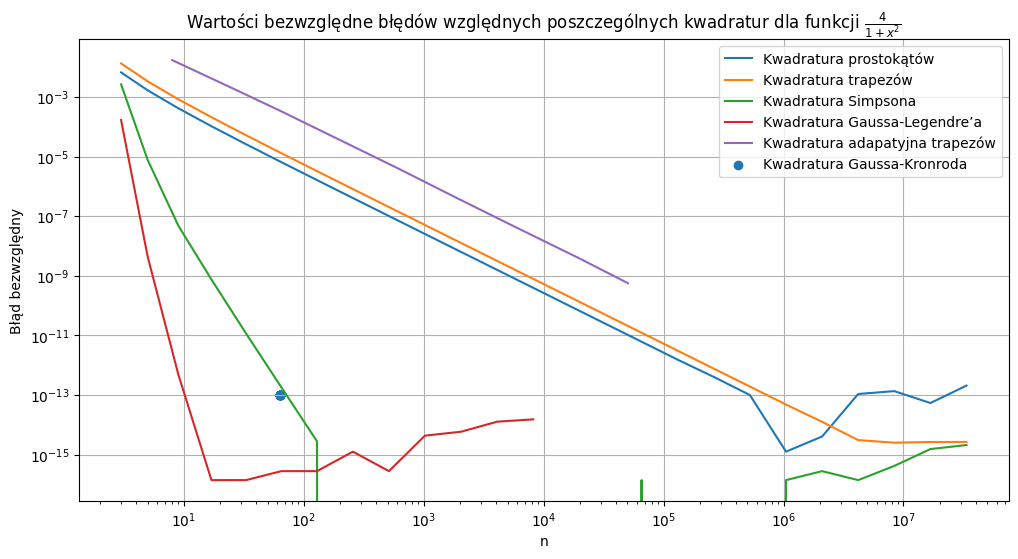

In [14]:
plt.figure(figsize=(12, 6))
plt.title("Wartości bezwzględne błędów względnych poszczególnych kwadratur dla funkcji $\\frac{4}{1+x^{2}}$")
plt.loglog(n_vec, quad_err, label="Kwadratura prostokątów")
plt.loglog(n_vec, trap_err, label="Kwadratura trapezów")
plt.loglog(n_vec, simps_err, label="Kwadratura Simpsona")
plt.loglog(n_vec_gauss, gaus_err, label="Kwadratura Gaussa-Legendre’a")
plt.loglog(trap_adaptive_n_vec, trap_adaptive_err, label="Kwadratura adapatyjna trapezów")
plt.scatter(gauss_kronrod_n_vec, gauss_kronrod_err, label="Kwadratura Gaussa-Kronroda")
plt.xlabel('n')
plt.ylabel('Błąd bezwzględny')
plt.legend()
plt.grid(True)
plt.show()

*Wykres 1.* Wartość bezwzględna błędu względnego dla poszczególnych kwadratur w zależności od liczby ewaluacji funkcji $\frac{4}{1+x^{2}}$.

Jak widać na wykresie 1 kwadratura adaptacyjna trapezów ma nieco większe wartości błędu względnego niż kwadratury trapezów i prostokątów, ale wartości te maleją w tym samym tempie. Kwadratura Gaussa-Kronroda ma stałą ilość ewaluacji równą $63$ i stałą wartość błędu równą $1.0463^{-13}$.

## Zadanie 2
Na początku zdefiniowaliśmy funkcje podcałkowe $$ \sqrt{x} \log x $$ oraz $$\left( \frac{1}{(x - 0.3)^2 + a} + \frac{1}{(x - 0.9)^2 + b} - 6 \right)$$ dla $a=0.001$ i $b=0.004$. Wykorzystaliśmy kod z poprzedniego zadania z podmienionymi funkcjami oraz wartościami całki (odpowiednio $-\frac{4}{9}$ i $\frac{1}{\sqrt{a}} \left( \operatorname{arctg} \frac{1 - x_0}{\sqrt{a}} + \operatorname{arctg} \frac{x_0}{\sqrt{a}} \right)$) do wygenerowania wykresów zależności wartości błędów bezwzględnych od ilości ewaluacji funkcji.

In [15]:
def calc_and_plot_err(f, real_integral_val, f_string):
    a = 0
    b = 1


    def rect_integral(xs):
        s = 0
        for i in range(len(xs) - 1):
            dx = xs[i + 1] - xs[i]
            x = (xs[i] + xs[i + 1]) / 2
            s += f(x) * dx
        return s


    def trap_integral(xs):
        return trapezoid(f(xs), xs)


    def simps_integral(xs):
        return simpson(f(xs), xs)


    def trap_adaptive_integral(epsrel):
        return quad_vec(f, a + np.finfo(np.double).eps, b, epsrel=epsrel, quadrature='trapezoid', full_output=True)


    def gauss_kronrod_integral(epsrel):
        return quad_vec(f, a, b, epsrel=epsrel, quadrature='gk21', full_output=True)


    m_vec = np.arange(1, 26)
    n_vec = 2 ** m_vec + 1


    def calc_err(integral_fun, n):
        xs = np.linspace(a, b, n + 2, dtype=np.double)[1:-1] # exclude a and b due to np.log(0) problems
        vals = integral_fun(xs)
        return np.abs((vals - real_integral_val) / real_integral_val)


    def calc_err_and_eval_adaptive(integral_fun, n):
        result = integral_fun(n)
        err = result[1]
        eval_count = result[-1].neval
        return err, eval_count


    quad_err = np.array([calc_err(rect_integral, n) for n in n_vec])
    trap_err = np.array([calc_err(trap_integral, n) for n in n_vec])
    simps_err = np.array([calc_err(simps_integral, n) for n in n_vec])

    adaptive_eps_vec = np.pow(0.1, np.arange(0, 15))

    trap_adaptive_calc = [calc_err_and_eval_adaptive(trap_adaptive_integral, eps) for eps in adaptive_eps_vec]
    trap_adaptive_err = [e for (e, _) in trap_adaptive_calc]
    trap_adaptive_n_vec = [n for (_, n) in trap_adaptive_calc]

    gauss_kronrod_calc = [calc_err_and_eval_adaptive(gauss_kronrod_integral, eps) for eps in adaptive_eps_vec]
    gauss_kronrod_err = [e for (e, _) in gauss_kronrod_calc]
    gauss_kronrod_n_vec = [n for (_, n) in gauss_kronrod_calc]
    m_vec_gauss = np.arange(1, 14)
    n_vec_gauss = 2 ** m_vec_gauss + 1
    leggaus_vals = [np.polynomial.legendre.leggauss(m) for m in n_vec_gauss]
    x_vec_gauss = [x_vec * 0.5 + 0.5 for (x_vec, _) in leggaus_vals]
    w_vec_gauss = [y for (_, y) in leggaus_vals]
    vals_gauss = np.array([np.sum(f(x) * 0.5 * w) for (x, w) in zip(x_vec_gauss, w_vec_gauss)])
    gaus_err = np.abs((vals_gauss - real_integral_val) / real_integral_val)
    plt.figure(figsize=(12, 6))
    plt.title(f"Wartości bezwzględne błędów względnych poszczególnych kwadratur dla funkcji {f_string}")
    plt.loglog(n_vec, quad_err, label="Kwadratura prostokątów")
    plt.loglog(n_vec, trap_err, label="Kwadratura trapezów")
    plt.loglog(n_vec, simps_err, label="Kwadratura Simpsona")
    plt.loglog(n_vec_gauss, gaus_err, label="Kwadratura Gaussa-Legendre’a")
    plt.loglog(trap_adaptive_n_vec, trap_adaptive_err, label="Kwadratura adapatyjna trapezów")
    plt.scatter(gauss_kronrod_n_vec, gauss_kronrod_err, label="Kwadratura Gaussa-Kronroda")
    plt.xlabel('n')
    plt.ylabel('Błąd bezwzględny')
    plt.legend()
    plt.grid(True)
    plt.show()

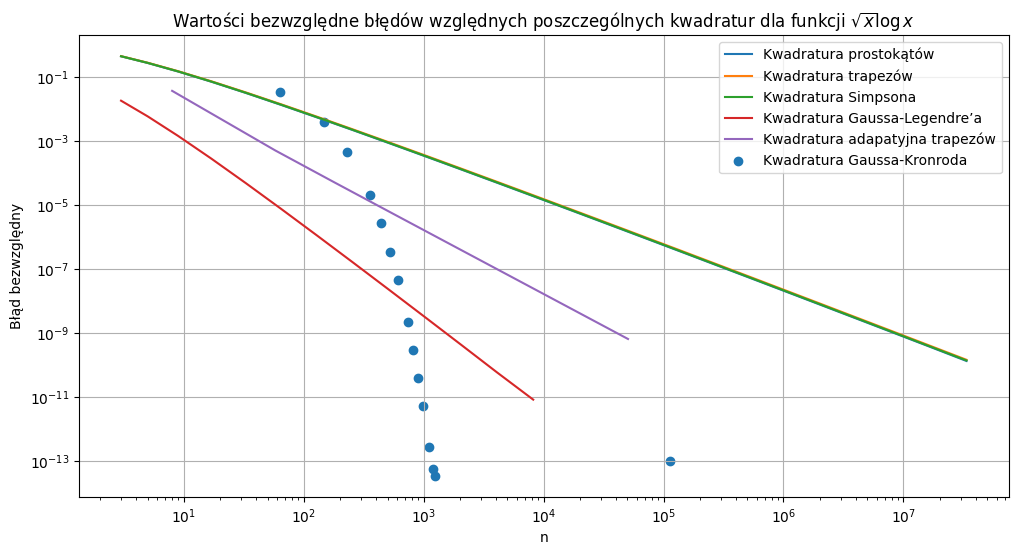

In [16]:
def fa(x):
    return np.sqrt(x) * np.log(x)

real_val_a = -4/9

calc_and_plot_err(fa, real_val_a, "$\\sqrt{x} \\log x$")

*Wykres 2.* Wartość bezwzględna błędu względnego dla poszczególnych kwadratur w zależności od liczby ewaluacji funkcji $\sqrt{x} \log x$.

Jak widać na wykresie 2 kwadratury prostokątów, trapezów i Simpsona mają identyczne błędy. Kwadratura adaptacyjna trapezów ma mniejszy błąd niż poprzednio wymienione kwadratury, a kwadratura Gaussa-Legendre'a jeszcze mniejszy. Kwadratura Gaussa-Kronroda nie ma stałej wartości w przeciwieństwie do funkcji z zadania 1. Dla małych ilości ewaluacji ma błąd podobny do kwadratury prostokątów, ale błąd ten szybko maleje i dla większych ilości ewaluacji jest mniejszy od innych kwadratur.

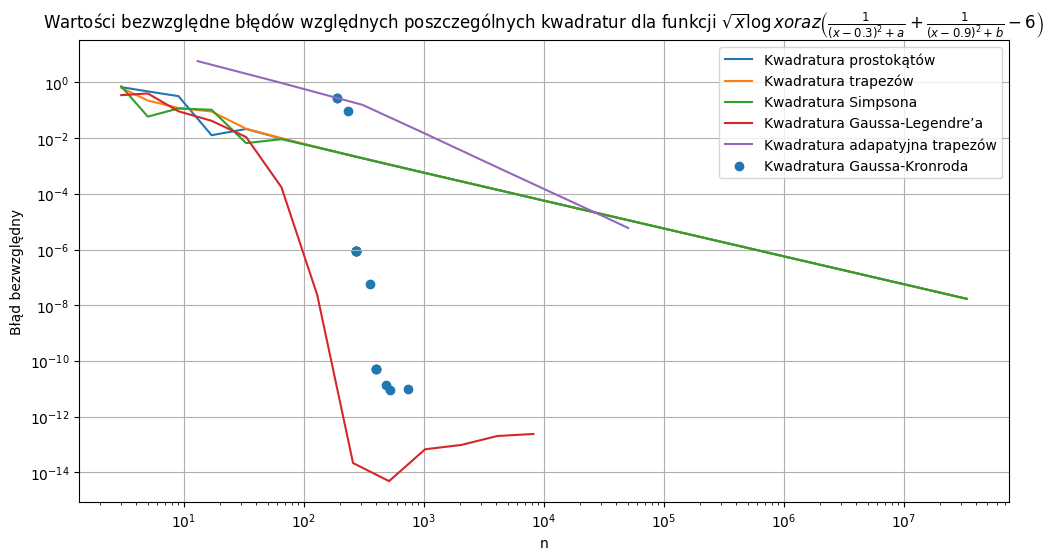

In [17]:
a = 0.001
b = 0.004

def fb(x):
    return 1 / ((x - 0.3)**2 + a) + 1 / ((x - 0.9)**2 + b) - 6

real_val_b = 1 / np.sqrt(a) * (np.arctan((1 - 0.3) / np.sqrt(a)) + np.arctan(0.3 / np.sqrt(a))) + 1 / np.sqrt(b) * (np.arctan((1 - 0.9) / np.sqrt(b)) + np.arctan(0.9 / np.sqrt(b))) - 6

calc_and_plot_err(fb, real_val_b, "$\\sqrt{x} \\log x $$  oraz  $$\\left( \\frac{1}{(x - 0.3)^2 + a} + \\frac{1}{(x - 0.9)^2 + b} - 6 \\right)$")

ee